In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import sqlite3 

In [3]:
con = sqlite3.connect(r"C:\Users\aryan\Downloads\password_data.sqlite")

In [4]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.head(10)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1
5,5,16623670p,1
6,6,yj9q3f8p,1
7,7,180ZIRUVIcuFERy,2
8,8,djredd09,1
9,9,yin172015,1


In [7]:
data.tail(10)

,index,password,strength
99990,99990,hxymUnjM1NghqCOE,2
99991,99991,aponeg428,1
99992,99992,uympkea05,1
99993,99993,shany2569,1
99994,99994,fumeq662,1
99995,99995,obejofi215,1
99996,99996,fmiopvxb64,1
99997,99997,czvrbun38,1
99998,99998,mymyxe430,1
99999,99999,glqjhkxb467,1


In [8]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [9]:
#Removeing irrelevant features 
data.drop(["index"] , axis=1 , inplace=True)

In [10]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


In [11]:
#Checking for duplicate rows 
data.duplicated().sum()

np.int64(0)

In [12]:
#Checking for missing values in coll
data.isnull().any()

password    False
strength    False
dtype: bool

In [13]:
data.isnull().any().sum() ## it means 0 feature have NAN values

np.int64(0)

In [14]:
#Checking datatypes of each feature
data.dtypes

password    object
strength     int64
dtype: object

In [15]:
data["strength"]

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [16]:
data["strength"].unique()

array([1, 2, 0])

In [17]:
# 3.. Performing Semantic Analysis !
   # e.g ,,      
          
          #a) How many password textual actually holds only numeric characters ?
          #b) How many password textual actually holds only Upper-case character ? 
          #c) How many password textual actually holds only alphabet ?
          #d) How many password textual actually holds alpha-numeric character ? 
          #e) How many password textual actually holds title-case character ? 
          #f) How many password textual actually holds some special special character ? 
          
          

In [18]:
data.columns

Index(['password', 'strength'], dtype='object')

In [19]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [20]:
data["password"][0]

'zxe870819'

In [21]:
type(data["password"][0])

str

In [22]:
### a) How many password textual actually holds only numeric characters ?
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [23]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [24]:
data[data["password"].str.isnumeric()].shape  ### only 26 people have set their password as only number !

(26, 2)

In [25]:
### b) How many password textual actually holds only Upper-case character ? 
data[data["password"].str.isupper()]

### around 1500 users have their password as only capital letters !

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [26]:
### c) How many password textual actually holds only alphabet ? 
data[data["password"].str.isalpha()].shape

### around 50 users have their password as alphabet letters only 

(50, 2)

In [27]:
### d) How many password textual actually holds alpha-numeric character ? 
data[data["password"].str.isalnum()]

### most of the users around 97K have their password as alpha-numeric.

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [28]:
### e) How many password textual actually holds title-case character ? 
data[data["password"].str.istitle()]

### around 932 users have their password having first alphabet capital 

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [29]:
### f) How many password textual actually holds special character ? 
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [30]:
import string

In [31]:
string.punctuation ## all punctuations defined in "string" package 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [33]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [34]:
data[data["password"].apply(find_semantics)==1]

## ie , 2663 observations have special characters in between them ..
## 2.6% people password actually uses special character in their password ..

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [126]:
## 4.. Applying Feature Engineering 
'''
password strength depends on 5 factors :

    Length of password
    Frequency of Lowercase Characters
    Frequency of Uppercase Characters
    Frequency of Numeric Characters
    Frequency of Special Characters

These will be the result of the google search to find factors effecting strength of password..


'''

'\npassword strength depends on 5 factors :\n\n    Length of password\n    Frequency of Lowercase Characters\n    Frequency of Uppercase Characters\n    Frequency of Numeric Characters\n    Frequency of Special Characters\n\nThese will be the result of the google search to find factors effecting strength of password..\n\n\n'

In [36]:
#### length of every Password 
data["password"][0]

'zxe870819'

In [37]:
len(data["password"][0]) 

9

In [38]:
data["length"] = data["password"].str.len() 

In [40]:
#### Frequency of Lowercase Characters :
password = "Aryan03"

In [41]:
[char for char in password if char.islower()]

['r', 'y', 'a', 'n']

In [42]:
len([char for char in password if char.islower()])

4

In [43]:
len([char for char in password if char.islower()])/len(password)

0.5714285714285714

In [45]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [46]:
#### Frequency of Uppercase Characters :
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [47]:
#### Frequency of Numeric Characters :
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [48]:
### applying user-defined functions ..
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [49]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


In [50]:
#### Frequency of Special-case Characters :
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [51]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3) ## applying "freq_special_case" function

In [52]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [53]:
data["special_char_freq"] = data["special_char_freq"]/data["length"] ## noromalising "special_char_freq" feature 

In [54]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [55]:
## 5. Performing Descriptive Statistics 
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [56]:
data[['length' , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [57]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

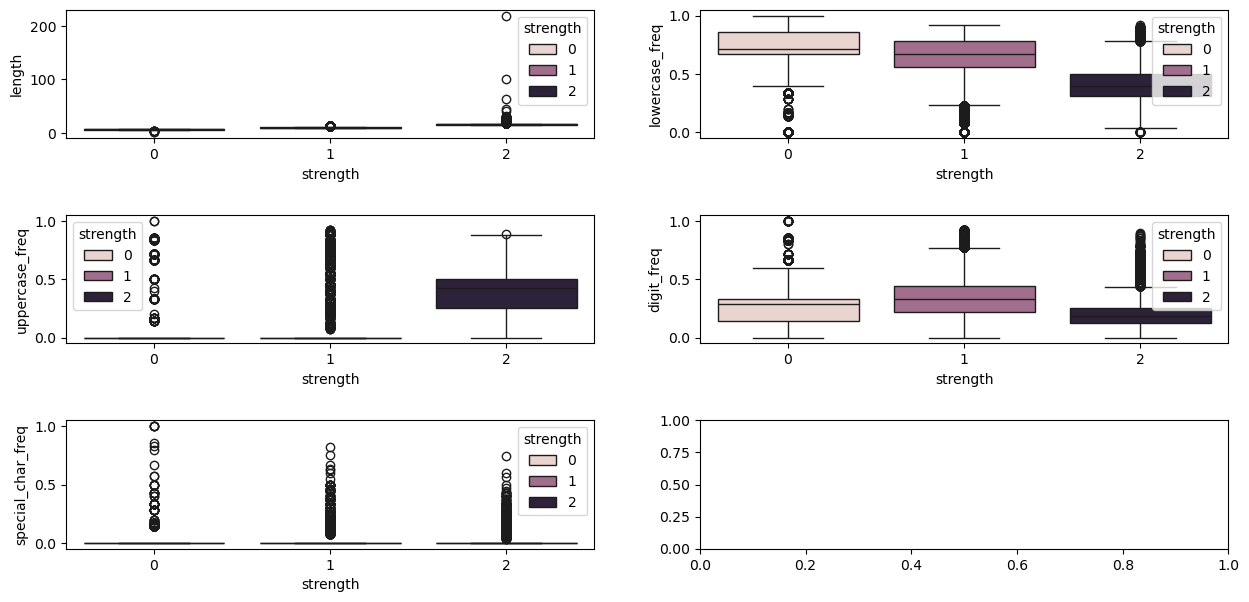

In [59]:
#### Similarly , if u need viz representation of above output 
## bcz boxplot basically gives us 5-point summary of data !
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

In [61]:
## 6.. Feature Importance 
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [62]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

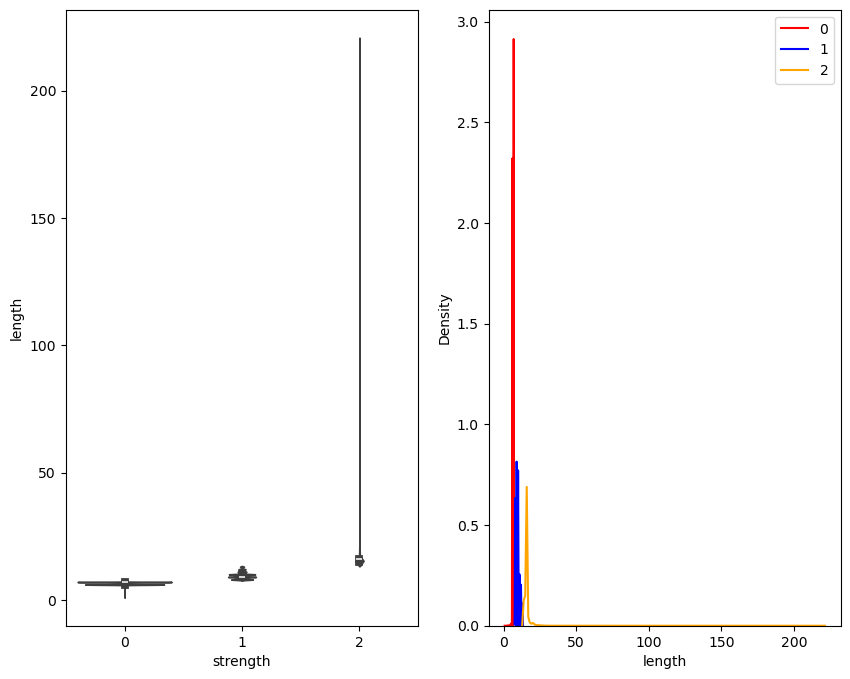

In [63]:
get_dist(data , "length")

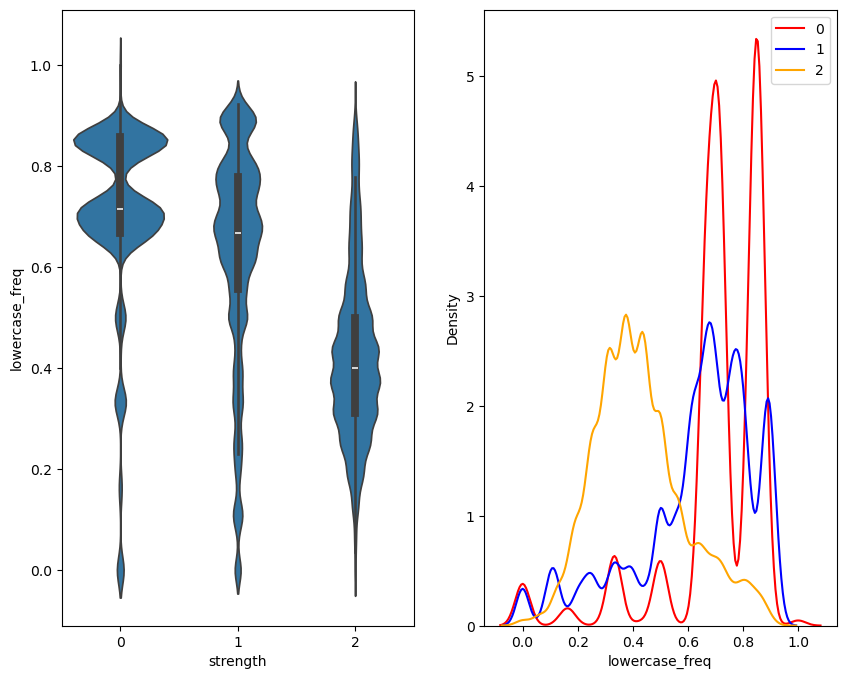

In [64]:
### we have few overlappping region in distribution plot 
### when class is 2 , we have higher value of 'length' than class 1 & class 0

## it means 'length' is a interesting feature as we have very less overlapping region

## similarly from violinplot ,we will say on account of less overlappping , 
## this feature 'length' is amazing & useful in determining the strength

get_dist(data , 'lowercase_freq')

In [65]:
### we have some kind of overlappping region in distribution plot 
### when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

## it means 'lower_freq' is a interesting feature upto some extent as have some overlapping region

## similarly from violinplot ,we will say on account of such overlappping , 
## when class is 2 we have less value of 'lower_freq' than class 1 & class 0
## this feature 'lower_freq' is a interesting feature upto some extent in determining the strength

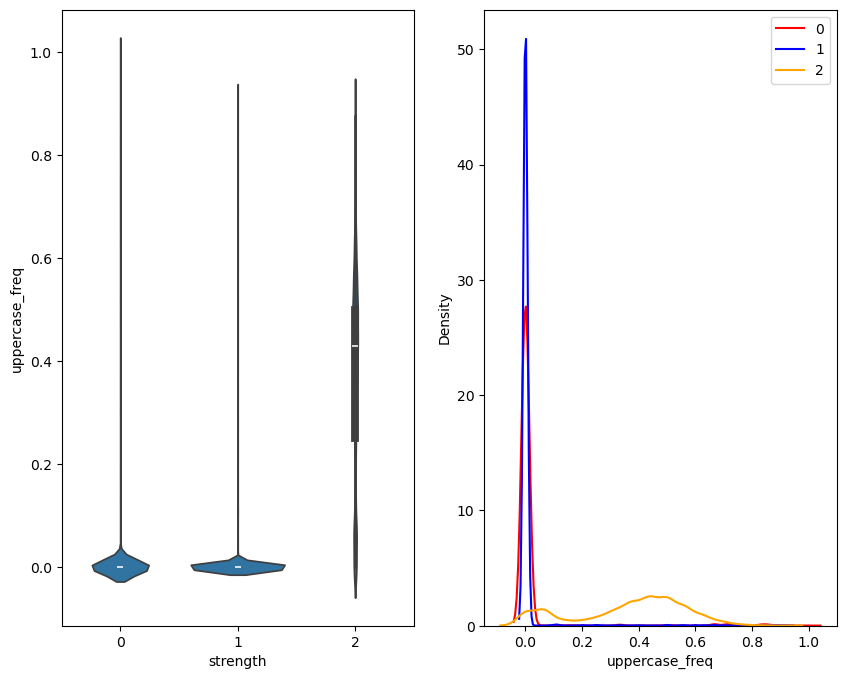

In [66]:
get_dist(data , 'uppercase_freq')

In [67]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

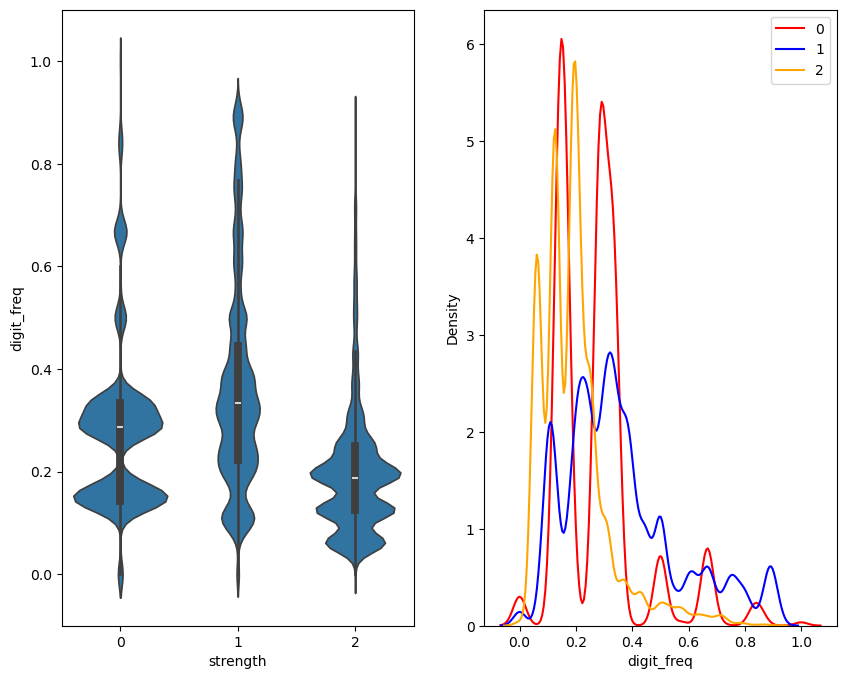

In [68]:
get_dist(data , 'digit_freq')

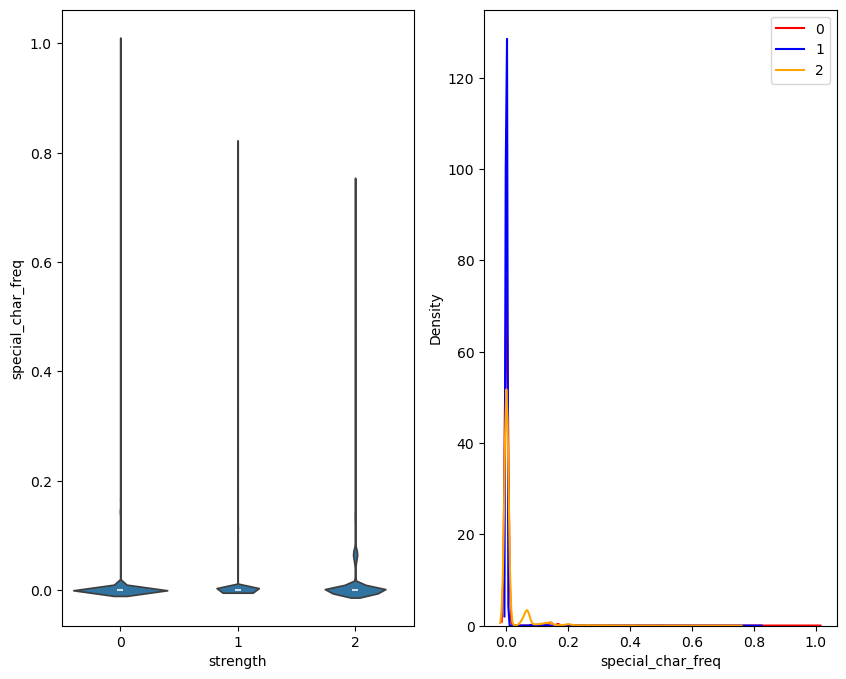

In [69]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

get_dist(data , 'special_char_freq')

In [71]:
## 7.. Applying TF_IDF on data
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [72]:
dataframe = data.sample(frac=1) ### shuffling randomly for robustness of ML moodel 

In [73]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
44332,cR2cNXDEzOAGcQdC,2,16,0.312,0.625,0.062,0.0
17739,29427cl3,1,8,0.250,0.000,0.750,0.0
30846,selena123,1,9,0.667,0.000,0.333,0.0
46054,111tre,0,6,0.500,0.000,0.500,0.0
42431,vivero100,1,9,0.667,0.000,0.333,0.0
...,...,...,...,...,...,...,...
37747,bl4ckg0ld,1,9,0.778,0.000,0.222,0.0
97549,CMA7XaTg4OAtuME8,2,16,0.250,0.562,0.188,0.0
80586,zawun250,1,8,0.625,0.000,0.375,0.0
36481,lenin08,0,7,0.714,0.000,0.286,0.0


In [74]:
x = list(dataframe["password"])

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer 
## import TF-IDF vectorizer to convert text data into numerical data

In [78]:
vectorizer = TfidfVectorizer(analyzer="char")

In [79]:
X = vectorizer.fit_transform(x)

In [80]:
X.shape


## ie (100000,1) passwords gets represented using (100000, 99)
## ie each password gets represented using 99 dimensions ..

(100000, 99)

In [81]:
dataframe["password"].shape

(100000,)

In [82]:
X.toarray()  ### to get entire matrix of TF-IDF for 100000 passwords .

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
X.toarray()[0] ## TF-IDF scores of Ist row

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.1436379 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.11956288, 0.        , 0.74909359,
       0.36017273, 0.14006266, 0.        , 0.18979184, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15370249, 0.14691491, 0.        , 0.2264677 , 0.15926574,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.22677736, 0.        , 0.21278901, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [84]:
dataframe["password"]

44332    cR2cNXDEzOAGcQdC
17739            29427cl3
30846           selena123
46054              111tre
42431           vivero100
               ...       
37747           bl4ckg0ld
97549    CMA7XaTg4OAtuME8
80586            zawun250
36481             lenin08
81943          gasito1972
Name: password, Length: 100000, dtype: object

In [85]:
len(vectorizer.get_feature_names_out())

99

In [86]:
### returns feature/char_of_passwords/columns names

vectorizer.get_feature_names_out()

## these are the various chars to which different TF-IDF values are assigned for 100000 passwords .

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [87]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [88]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
## 8.. Applying Machine Learning algorithm !
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [90]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [91]:
y = dataframe["strength"]

In [92]:
#### split data into train & test
    #train- To learn the relationship within data, 
    #test- To do predictions, and this testing data will be unseen to my model

from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [94]:
X_train.shape

(80000, 101)

In [95]:
y_train.shape

(80000,)

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
## Appling Multinomial logistic Regression as have data have 3 categories in outcomes

clf = LogisticRegression(multi_class="multinomial")

In [98]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [99]:
y_pred = clf.predict(X_test) 
## doing prediction on X-Test data

In [100]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [101]:
from collections import Counter

In [102]:
Counter(y_pred)

Counter({np.int64(1): 17292, np.int64(2): 1650, np.int64(0): 1058})

In [103]:
## 9.. Doing prediction on sample data (user-entered input)
### as Logistic reg. model'clf' was trained on 101 features [99 from TF-IDF + 2 features from (total_length+lower_case_freq)]
## hence we need to convert any input(password) into (1,101) so that model will accept this as Input .

In [104]:
password = "%@123abcd"

In [105]:
sample_array = np.array([password])

In [106]:
sample_matrix = vectorizer.transform(sample_array)

In [107]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [108]:
sample_matrix.toarray().shape

### right now , array dim. is (1,99) so now we need to make it as : (1,101) so that my model will accept it as input..
### we need to add (length_of_password) & (total_lowercase_chars) in passsword

(1, 99)

In [109]:
password

'%@123abcd'

In [110]:
len(password)

9

In [111]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [112]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [113]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [114]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [115]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101).shape

(1, 101)

In [116]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

In [117]:
clf.predict(new_matrix)

array([0])

In [118]:
### Automated it (by designing a function)

def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [119]:
predict()

Enter a password :  swag@90


'password is strong'

In [120]:
predict()

Enter a password :  Mortal


'Password is weak'

In [121]:
predict()

Enter a password :  @Goblin


'password is strong'

In [122]:
## 10.. Model evaluation :
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [123]:
accuracy_score(y_test , y_pred)

0.7987

In [124]:
confusion_matrix(y_test , y_pred)

array([[  560,  2165,     2],
       [  426, 14059,   293],
       [   72,  1068,  1355]])

In [125]:
### creating report of model
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.53      0.21      0.30      2727
           1       0.81      0.95      0.88     14778
           2       0.82      0.54      0.65      2495

    accuracy                           0.80     20000
   macro avg       0.72      0.57      0.61     20000
weighted avg       0.78      0.80      0.77     20000

